## The Titanic

#### The aim of this project is to build a predictive model that analyses the sort of people thet were more likely to survice the Titanic, using the data of the passengers.

#### We have the datasets in test.csv and train.csv. I will use the train.csv to train the model and test the model on test data

### 1.1  Import all the required modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,precision_score,f1_score,recall_score,precision_recall_curve

### 1.2 Read the test and train data

In [3]:
train_data = pd.read_csv('./Datasets/titanic_train.csv')
test_data = pd.read_csv('./Datasets/titanic_test.csv')

### 1.3 Display the first 5 rows of the train datasets

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1.3.1 Display the first 5 rows of the test datasets

In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 1.4 Display the short summary of the Dataframe

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1.5 See the Dataframe Description

In [11]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


**Observations**
- There are 3 passenger classes. there were more people is class 3 (about 50%) than any other class. About 25% were in class 2
- The average age of the passengers was 30 years old.
- The average fare is about 32.2 with the maximum fare of 512 Some fares has zero values. We need to check if these are null values

### 1.6 Checking the shape of the Dataframe

In [21]:
train_data.shape

(891, 12)

#### The Dataframe has 891 rows and 12 columns

### 1.6 Checking the columns of the Dataframe

In [22]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Count the data types in the dataframe

In [23]:
train_data.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

The dataset has 5 of its features to be integer data type, 5 of String/object data type and 2 of float data types

### 1.9 Check out null values

In [24]:
def null_values(df):
    total_null = df.isnull().sum().sort_values(ascending = False)
    count_null = df.isnull().count().sort_values(ascending = False)
    percent_null = total_null/count_null
    total = pd.concat([total_null,percent_null], axis = 1, keys=['Total','Percent'])
    return total

In [25]:
null_values(train_data)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


#### The columns with the most null values are Cabin and Age

In [12]:
train_data['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [19]:
train_data[train_data['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [18]:
train_data[train_data['Fare']==0]['PassengerId'].count()

15

There are about 15 passengers with Zero fares. About 12 of these passengers dont have cabins as well. We will treat them as null values and work on them

## 2. Exploratory Analysis of the Data

In [26]:
### 2.1 Let us see the age distribution of the people on Titanic

In [29]:
# Defining the hist_box() function
def hist_box(data,col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
      # Adding a graph in each part
    sns.boxplot(data[col], ax=ax_box, showmeans=True)
    sns.distplot(data[col], ax=ax_hist)
    plt.show()

In [ ]:
hist_box(train_data,)

Text(0, 0.5, 'Frequency')

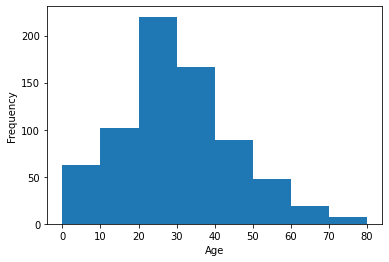

In [27]:
plt.hist(train_data.Age, bins=np.arange(0,90,10))
plt.xlabel('Age')
plt.ylabel('Frequency')

Most of the passenger were between 20 and 40 years old. The Age distribution is a little right skewed

In [28]:
train_data['Age'].skew()

0.38910778230082704

### 2.1 Let us explore the data for Age and Survived

In [ ]:
sns.barplot(data = train_data, x = 'Sex', y = 'Survived')

In [ ]:
sns.barplot(data = train_data, x = 'Sex', y = 'Age', hue = 'Survived')
plt.legend()

In [ ]:
### 2.2 Pair the features with pairplot

In [ ]:
sns.pairplot(train_data, hue = 'Survived')

#### Observation: Younger males survived more than the older males whilst the older females survived more that the younger females

#### Observations: There were more female survivor than male in the Titanic

#### 2.3 Let us see the correlation amongst the features

In [ ]:
plt.figure(figsize = (10,8))
matrix = np.triu(train_data.corr())
sns.heatmap(train_data.corr(), annot=True, mask = matrix)

#### Observation: There is no significant correlation amongest the features

## 3. Clean the Datasets (both train and test data)
Here are some cleanings to be done.
* On the train dataset, Survived column is our dependent variable (Y) while other columns are independent variable (X)
* We will drop Cabin, fill the null values of Embarked column with 'ffill' and fill the null values of Age column with its median
* We replace the calues of Sex column with 1 for Male and 2 for female.
* We replace the values of Embarked column with 1 for 'S', 2 for 'C' and 3 for 'Q'

### 3.1 Drop Cabin, Ticket and Name columns on both datasets

In [ ]:
train_data.drop(['Cabin','Ticket','Name'], axis = 1, inplace = True)
test_data.drop(['Cabin','Ticket','Name'], axis = 1, inplace = True)

### 3.2 Fill the null values in Embark column with forward fill 'ffill' and Age with its median

In [ ]:
train_data.fillna(method = 'ffill', inplace = True)
test_data.fillna(method = 'ffill', inplace = True)

train_data = pd.get_dummies(data = train_data,columns=['Pclass','Embarked'])
test_data = pd.get_dummies(data = test_data,columns=['Pclass','Embarked'] )

In [ ]:
median_age_train = train_data.Age.median()
median_age_test = test_data.Age.median()
train_data['Age'].fillna(median_age_train, inplace = True)
test_data['Age'].fillna(median_age_test, inplace = True)

### 3.3 Replace the values in required columns
* Replace the values in Sex column with 1 for male and 2 for female.
* Replace Embark column S, C and Q with 1,2 and 3 respectively.

In [ ]:
train_data['Sex'].replace({'male':1,'female':2}, inplace = True)
test_data['Sex'].replace({'male':1,'female':2}, inplace = True)

### 3.4 Check the head of the datasets

In [ ]:
train_data.head()

## 4.  Dependent and independent variables
* Split the train data into dependent variable and independent variable. 
* Survived is the dependent variable Y, Other columns are the independent variable X

In [ ]:
Y = train_data['Survived']
X = train_data.drop('Survived', axis = 1)

### 5. Split the train data with train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

## 6. Create the models



### 6.1 10 different models are created to see the one with the best accuracy

In [ ]:

dict_classifiers = {
    "LogisticRegression":LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=6),
    "MLP": MLPClassifier(alpha=1, max_iter=1000),
    "AdaBoost":AdaBoostClassifier(),
    "GaussianNB":GaussianNB(),
    "QuadraticDiscriminant":QuadraticDiscriminantAnalysis(),
    "GradientBoost":GradientBoostingClassifier(),
    "SGD":SGDClassifier(),
    "XGB":XGBClassifier()}

### 6.2 Define a function to fit, predict and calculate the accuracy_score, recall, f1_score and kappa

In [ ]:
def evaluation_matrix(model, Xval, yval):
   
    yhat_probs = model.predict(Xval)
    yhat_classes = yhat_probs
    #accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(yval, yhat_classes)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(yval, yhat_classes, average='weighted')
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(yval, yhat_classes, average='weighted')
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(yval, yhat_classes, average='weighted')
    print('F1 score: %f' % f1)
    # kappa
    kappa = cohen_kappa_score(yval, yhat_classes)
    print('Cohens kappa: %f' % kappa)
    # ROC AUC
    #auc = roc_auc_score(yval, yhat_probs, multi_class = 'ovr')
    #print('ROC AUC: %f' % auc)
    #confusion matrix
    matrix = confusion_matrix(yval, yhat_classes)
    print(matrix)
    return accuracy, precision, recall, f1, kappa

### 6.3 Create a function to return the model name and the metrics

In [ ]:
def batch_classify(X_train, y_train, X_val, y_val, no_classifiers = 15, verbose = True):

    dict_models = {}
    for classifier_name,classifier in list(dict_classifiers.items())[:no_classifiers]:
        #t_start = time.clock()
        classifier.fit(X_train, y_train)
        #t_end = time.clock()
        accuracy, precision, recall, f1, kappa = evaluation_matrix(classifier, X_val, y_val)
        dict_models[classifier_name] = {'model': classifier, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1, 'Kappa': kappa}
        
    return dict_models

### 6.4 Create a function to display the result as a dataframe, sorting by Accuracy score

In [ ]:
def display_dict_models(dict_models, sort_by='Accuracy'):

    cls = [key for key in dict_models.keys()]
    accuracy = [dict_models[key]['Accuracy'] for key in cls]
    precision = [dict_models[key]['Precision'] for key in cls]
    recall = [dict_models[key]['Recall'] for key in cls]
    f1 = [dict_models[key]['F1'] for key in cls]
    kappa = [dict_models[key]['Kappa'] for key in cls]
   
    df_ = pd.DataFrame(data=np.zeros(shape=(len(cls),6)), columns = ['classifier', 'Accuracy', 'Precision', 'Recall', 'F1', 'Kappa'])

    for ii in range(0,len(cls)):
        df_.loc[ii, 'classifier'] = cls[ii]
        df_.loc[ii, 'Accuracy'] = accuracy[ii]
        df_.loc[ii, 'Precision'] = precision[ii]
        df_.loc[ii, 'Recall'] = recall[ii]
        df_.loc[ii, 'F1'] = f1[ii]
        df_.loc[ii, 'Kappa'] = kappa[ii]
       
        #df_.loc[ii, 'train_time'] = training_t[ii]
    
    display(df_.sort_values(by=sort_by, ascending=False))
    return df_

In [ ]:
models = batch_classify(X_train, y_train, X_val, y_val)

In [ ]:
df = display_dict_models(models)

### Observation, The GradientBoost model has the best accuracy, hence will be use for on the test data

In [ ]:
model_gb = GradientBoostingClassifier()

## 7. Read the submission data

In [ ]:
submission = pd.read_csv('./Datasets/gender_submission.csv')

### 7.1 Use the random forest model on the test data to predict the survivors

In [ ]:
submission['Survived'] = model_gb.fit(X_train,y_train).predict(test_data)

In [ ]:
submission.head()

### 7.2 Load the result in a csv format

In [ ]:
#submission.to_csv('submissiongb.csv', index=False, index_label=False)

In [ ]:
import pickle

In [ ]:
pickle.dump(model_gb, open('model.pkl','wb'))